# Прокофьев Игорь Витальевич
## Группа ДПИ22-1м
## Семинар 3, вариант 10

1.	Сгенерировать два вектора значений (f1 и f2), показывающий изменение синусоидального сигнала. 
Параметры сигналовследующие: длительность – 2 сек, количество значений в 1 сек (частота дискретизации) – 1000,  

| Частота для f1, Гц | Частота для f2 | Амплитуда для f1 | Амплитуда для f2 |
| :-: | :-: | :-: | :-: |
| 15 | 10 | 1 | 3 |

Уравнение синусоидального сигнала:  
$U = A ⋅ sin(2π ⋅ ƒ ⋅ t)$  
где $А$ - амплитуда сигнала, $ƒ$ - частота (в герцах)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
%matplotlib inline

In [2]:
# Генерируем наборы данных
amp_1 = 1
amp_2 = 3
freq_1 = 15
freq_2 = 10


t = np.arange(0, 2, 0.001)

f1 = np.array(amp_1 * np.sin(2 * np.pi * freq_1 * t))
f2 = np.array(amp_2 * np.sin(2 * np.pi * freq_2 * t))

2.	Отобразить одновременно графики f1 и f2.

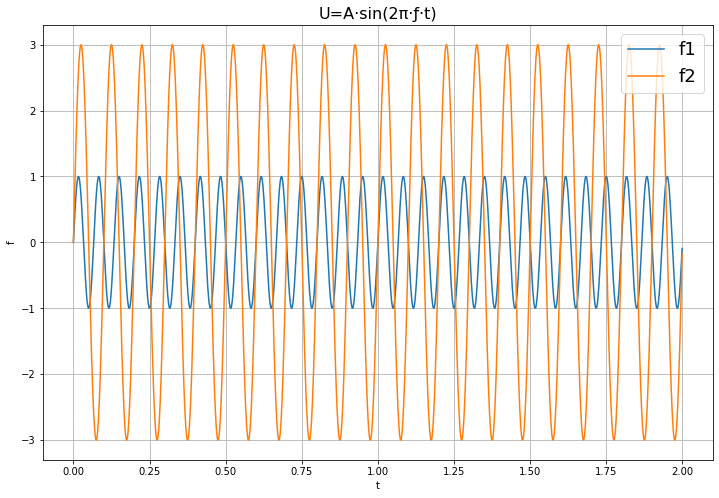

In [3]:
# Посмотрим, что получилось

plt.figure(figsize=(12, 8))
plt.title('U=A⋅sin(2π⋅ƒ⋅t)', fontsize=16)
plt.xlabel('t')
plt.ylabel('f')
plt.grid(True)
plt.plot(t, f1, label='f1')
plt.plot(t, f2, label='f2')
plt.legend(fontsize=18)
plt.show()

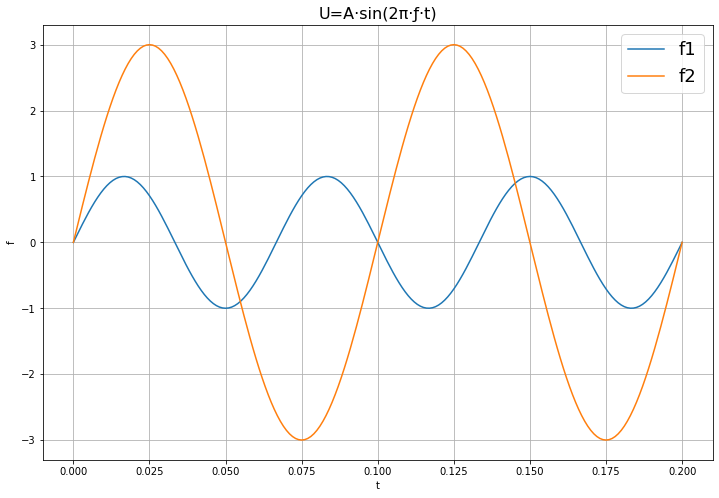

In [4]:
# Для наглядности выведем график в другом масштабе

def show_plot(*args, det=201):
    '''
    Формат: кортежи из nympy массива на 2000 элементов и его названия
    Пример: (f1, 'Функция 1'), ..., (fn, 'Функция n')
    '''
    import numpy as np
    t = np.arange(0, 2, 0.001)
    plt.figure(figsize=(12, 8))
    plt.title('U=A⋅sin(2π⋅ƒ⋅t)', fontsize=16)
    plt.xlabel('t')
    plt.ylabel('f')
    plt.grid(True)
    for arg in args:
        plt.plot(t[:det], arg[0][:det], label=arg[1])
    plt.legend(fontsize=18)
    plt.show()

show_plot((f1, 'f1'), (f2, 'f2'))

3.	Наложить на данные значения шум:  
a.	Случайно сгенерированные значения (амплитуда шума в 5 раз меньше наименьшей амплитуды из двух сигналов).  
b.	Низкочастотный синусоидальный сигнал (частота в 2 раза меньше наименьшей частоты из двух сигналов).


In [5]:
# установим seed, чтобы случайные значения не менялись при каждом перезапуске
np.random.seed(1000)
# Амплитуда шума согласно заданию 3a
noise_amp = min(amp_1, amp_2) / 5
# Генерируем массимв со значениями шума
noise = (np.random.random(2000) - 0.5) * noise_amp
# Накладываем шум на значения f1 и f2
f1_a = f1 + noise
f2_a = f2 + noise

# Герерируем низкочастотный синусоидальный сигнал согласно заданию 3b
sin_noise_freq = min(freq_1, freq_2) / 2
sin_noise = np.array(np.sin(2 * np.pi * sin_noise_freq * t))
# Накладываем шум на значения f1 и f2
f1_b = f1 + sin_noise
f2_b = f2 + sin_noise

4.	Отобразить на графике полученные зашумленные векторы значений. 

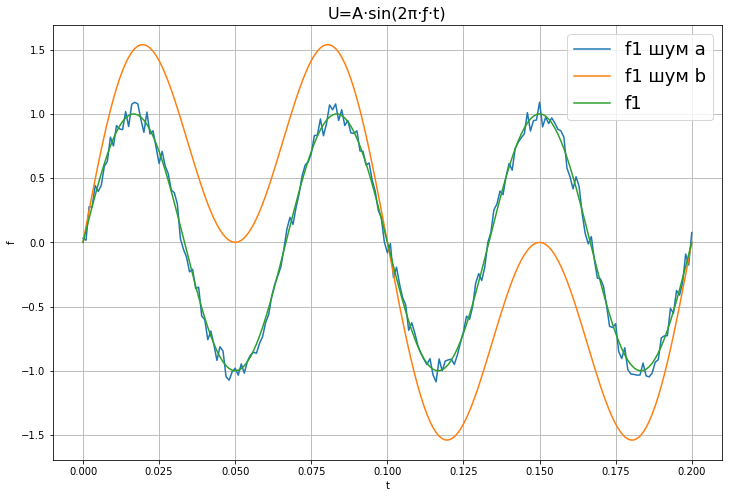

In [6]:
# Посмотрим, что получилось c графиком f1
show_plot((f1_a, 'f1 шум a'),
          (f1_b, 'f1 шум b'),
          (f1, 'f1'))

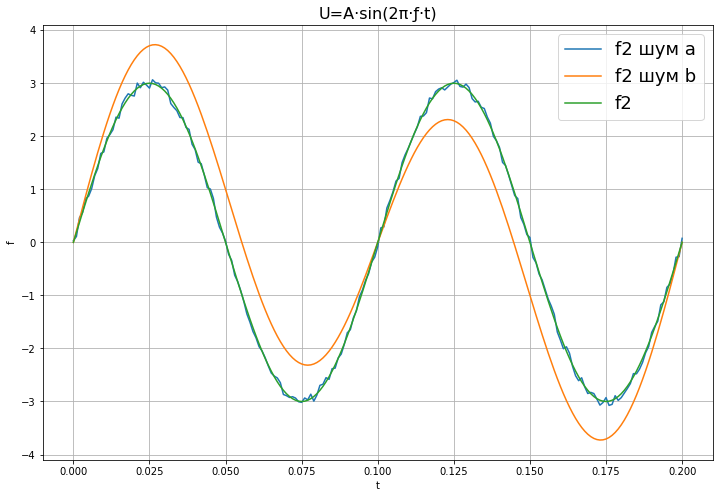

In [7]:
# Посмотрим, что получилось c графиком f2
show_plot((f2_a, 'f2 шум a'),
          (f2_b, 'f2 шум b'),
          (f2, 'f2'))

5.	Применить к зашумленных сигналам все виды фильтров. Параметры фильтрации постараться выбрать самостоятельно с целью максимального подавления шумов.  
6.	Отобразить на графике одновременной исходный вектор f1, зашумлённый и отфильтрованный.

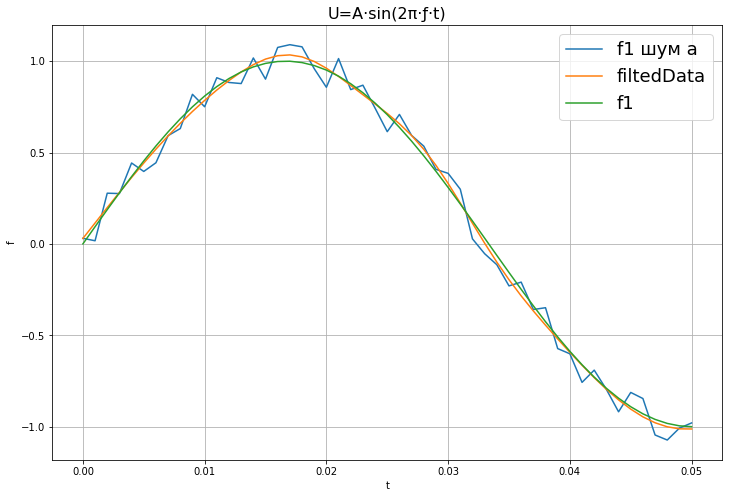

In [8]:
# Фильтрация нижних частот
wn = 2 * 100 / 1000
b, a = signal.butter(8, wn, 'lowpass')   # Значение 8 указывает порядок фильтра
filtedData = signal.filtfilt(b, a, f1_a) # данные - сигнал, который нужно отфильтровать

# Посмотрим, что получилось c графиком f1
show_plot((f1_a, 'f1 шум a'),
          (filtedData, 'filtedData'),
          (f1, 'f1'),
          det=51)

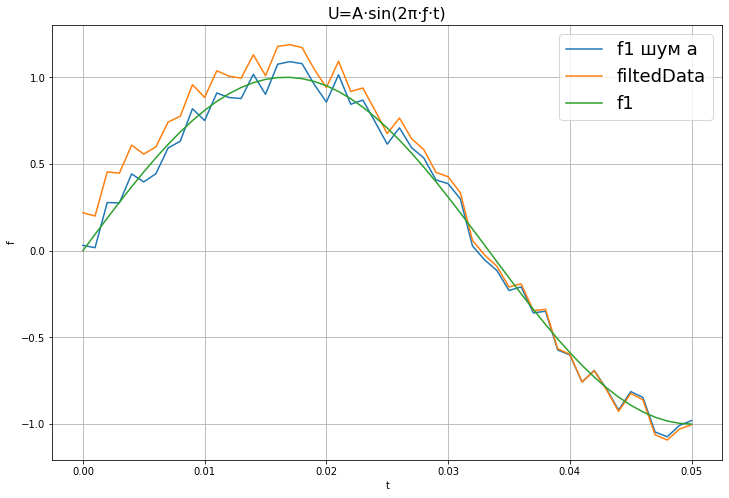

In [9]:
# Фильтр высоких частот
wn = 2 * 5 / 1000
b, a = signal.butter(8, wn, 'highpass')   # Конфигурационный фильтр 8 указывает порядок фильтра
filtedData = signal.filtfilt(b, a, f1_a)  # данные - это сигнал, который нужно отфильтровать

# Посмотрим, что получилось c графиком f1
show_plot((f1_a, 'f1 шум a'),
          (filtedData, 'filtedData'),
          (f1, 'f1'),
          det=51)

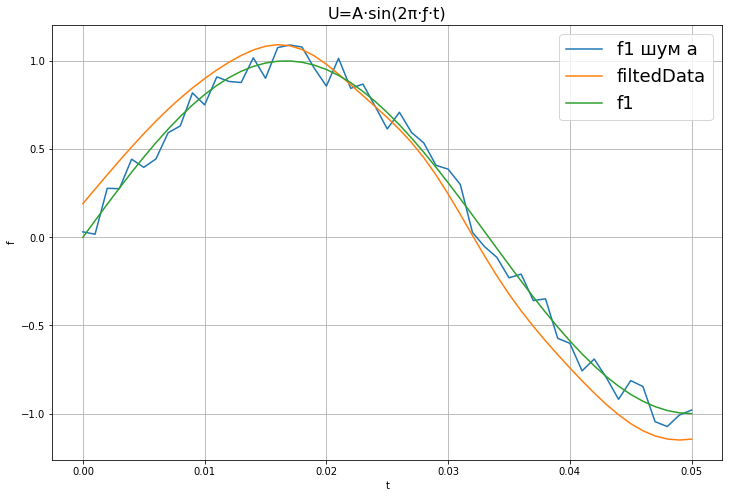

In [10]:
# Полосовой фильтр
wn1 = 2 * 10 / 1000
wn2 = 2 * 100 / 1000

wn = [wn1, wn2]
b, a = signal.butter(8, wn, 'bandpass')   # Конфигурационный фильтр 8 указывает порядок фильтра
filtedData = signal.filtfilt(b, a, f1_a)  # данные - это сигнал, который нужно отфильтровать

# Посмотрим, что получилось c графиком f1
show_plot((f1_a, 'f1 шум a'),
          (filtedData, 'filtedData'),
          (f1, 'f1'),
          det=51)

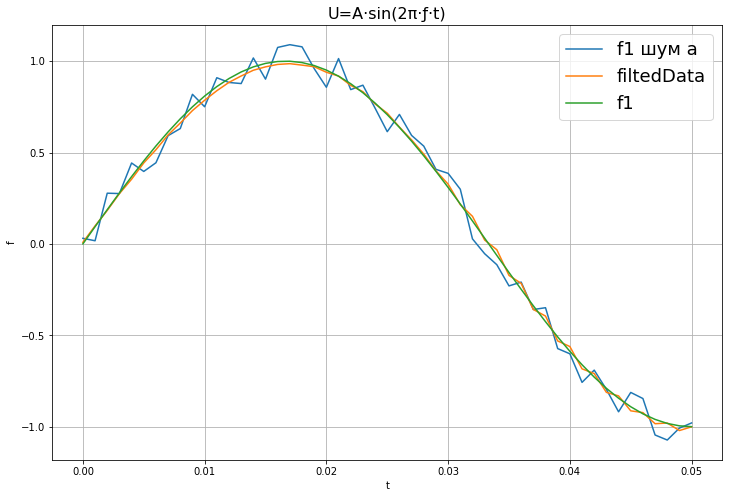

In [11]:
# Полосовой режекторный фильтр
wn1 = 2 * 20 / 1000
wn2 = 2 * 450 / 1000

wn = [wn1, wn2]
b, a = signal.butter(8, wn, 'bandstop')   # Число Параметр 8 указывает порядок фильтра
filtedData = signal.filtfilt(b, a, f1_a)  # данные - это сигнал, который нужно отфильтровать

# Посмотрим, что получилось c графиком f1
show_plot((f1_a, 'f1 шум a'),
          (filtedData, 'filtedData'),
          (f1, 'f1'),
          det=51)

7.	Отобразить на графике одновременной исходный вектор f2, зашумлённый и отфильтрованный.

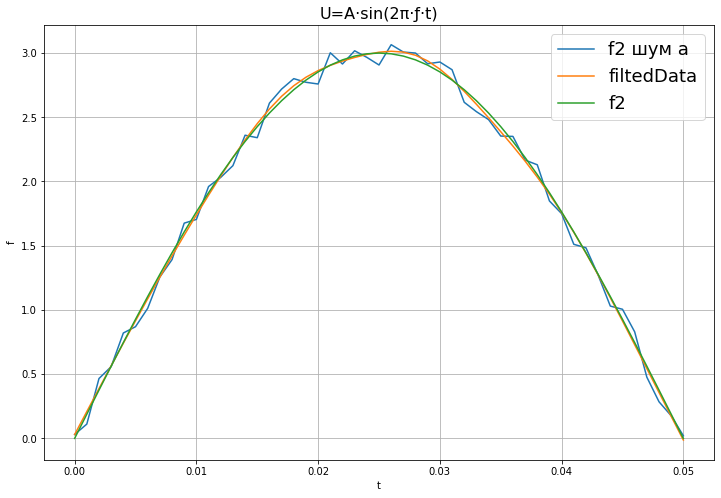

In [12]:
# Фильтрация нижних частот
wn = 2 * 100 / 1000
b, a = signal.butter(8, wn, 'lowpass')   # Значение 8 указывает порядок фильтра
filtedData = signal.filtfilt(b, a, f2_a) # данные - сигнал, который нужно отфильтровать

# Посмотрим, что получилось c графиком f2
show_plot((f2_a, 'f2 шум a'),
          (filtedData, 'filtedData'),
          (f2, 'f2'),
          det=51)

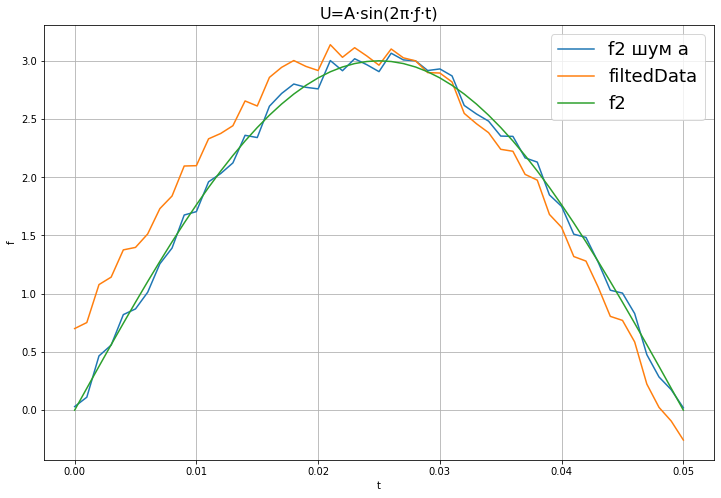

In [13]:
# Фильтр высоких частот
wn = 2 * 5 / 1000
b, a = signal.butter(8, wn, 'highpass')   # Конфигурационный фильтр 8 указывает порядок фильтра
filtedData = signal.filtfilt(b, a, f2_a)  # данные - это сигнал, который нужно отфильтровать

# Посмотрим, что получилось c графиком f2
show_plot((f2_a, 'f2 шум a'),
          (filtedData, 'filtedData'),
          (f2, 'f2'),
          det=51)

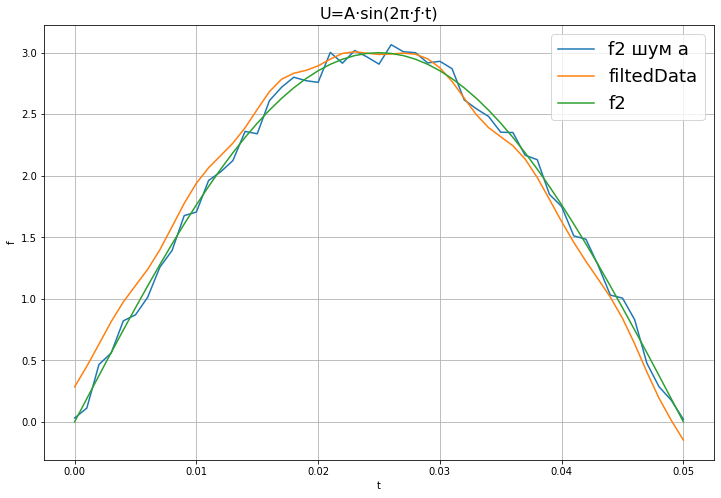

In [14]:
# Полосовой фильтр
wn1 = 2 * 6 / 1000
wn2 = 2 * 200 / 1000

wn = [wn1, wn2]
b, a = signal.butter(8, wn, 'bandpass')   # Конфигурационный фильтр 8 указывает порядок фильтра
filtedData = signal.filtfilt(b, a, f2_a)  # данные - это сигнал, который нужно отфильтровать

# Посмотрим, что получилось c графиком f1
show_plot((f2_a, 'f2 шум a'),
          (filtedData, 'filtedData'),
          (f2, 'f2'),
          det=51)

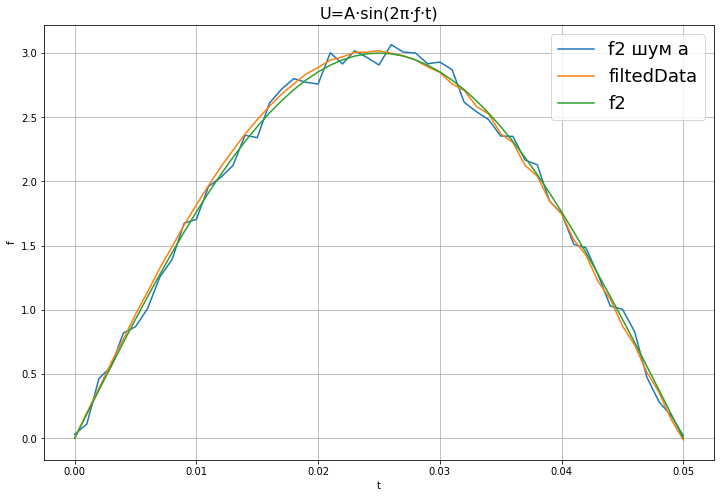

In [15]:
# Полосовой режекторный фильтр
wn1 = 2 * 20 / 1000
wn2 = 2 * 450 / 1000

wn = [wn1, wn2]
b, a = signal.butter(8, wn, 'bandstop')   # Число Параметр 8 указывает порядок фильтра
filtedData = signal.filtfilt(b, a, f2_a)  # данные - это сигнал, который нужно отфильтровать

# Посмотрим, что получилось c графиком f2
show_plot((f2_a, 'f2 шум a'),
          (filtedData, 'filtedData'),
          (f2, 'f2'),
          det=51)

8.	Сложить два сигнала f1 и f2, вывести график. Применяя последовательно разные виды фильтров постараться максимально подавить сигнал f2 для наилучшего отображения сигнала f1

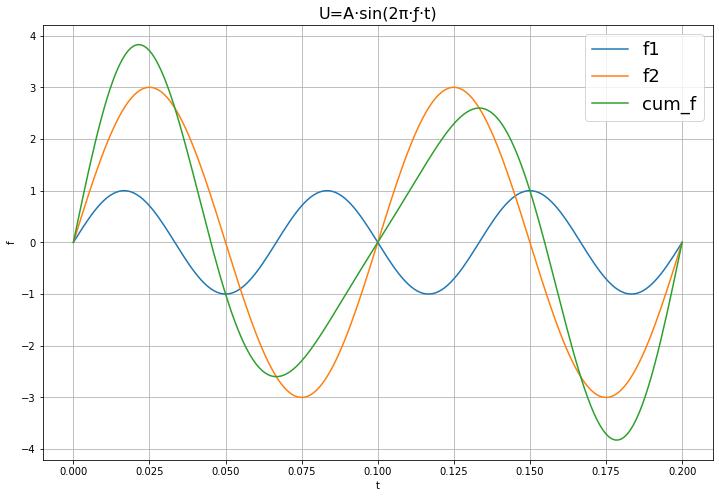

In [16]:
cum_f = f1 + f2

show_plot((f1, 'f1'),
          (f2, 'f2'),
          (cum_f, 'cum_f'),
          det=201)

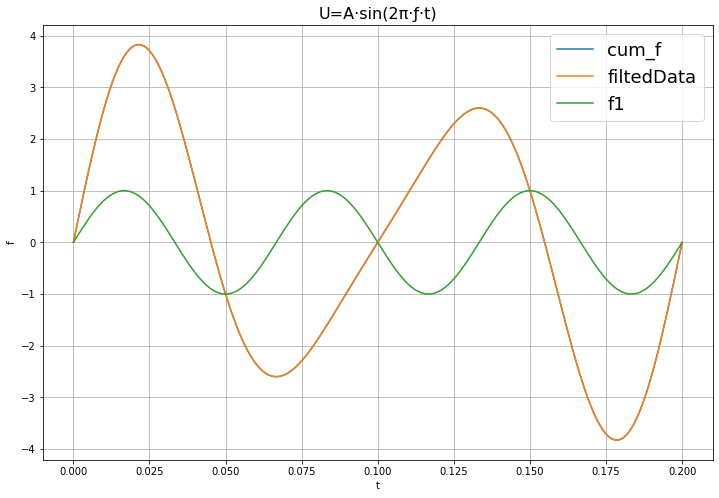

In [17]:
# Фильтрация нижних частот
wn = 2 * 200 / 1000
b, a = signal.butter(8, wn, 'lowpass')   # Значение 8 указывает порядок фильтра
filtedData = signal.filtfilt(b, a, cum_f) # данные - сигнал, который нужно отфильтровать

# Посмотрим, что получилось c графиком f1
show_plot((cum_f, 'cum_f'),
          (filtedData, 'filtedData'),
          (f1, 'f1'),
          det=201)

# Как видим - результат нулевой

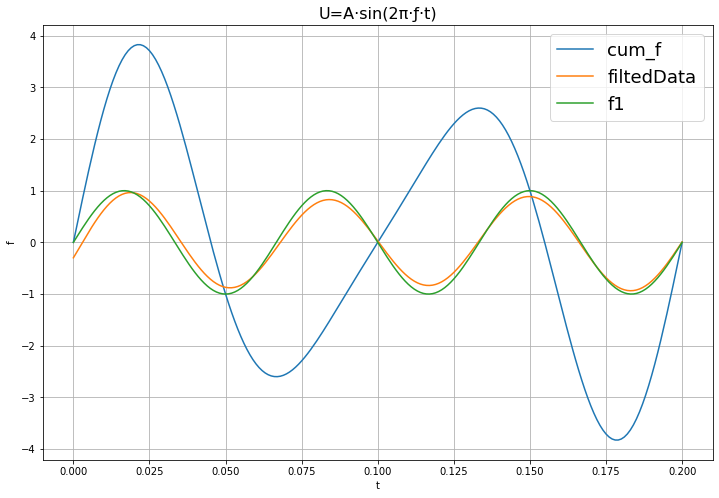

In [18]:
# Фильтр высоких частот
wn = 2 * 13 / 1000
b, a = signal.butter(8, wn, 'highpass')   # Конфигурационный фильтр 8 указывает порядок фильтра
filtedData = signal.filtfilt(b, a, cum_f)  # данные - это сигнал, который нужно отфильтровать

# Посмотрим, что получилось c графиком f1
show_plot((cum_f, 'cum_f'),
          (filtedData, 'filtedData'),
          (f1, 'f1'),
          det=201)

# Здесь есть видимый результат

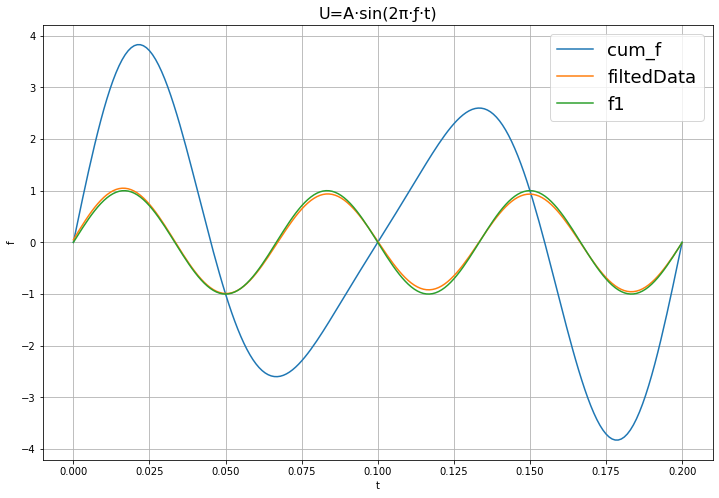

In [19]:
# Полосовой фильтр
wn1 = 2 * 13 / 1000
wn2 = 2 * 200 / 1000

wn = [wn1, wn2]
b, a = signal.butter(8, wn, 'bandpass')   # Конфигурационный фильтр 8 указывает порядок фильтра
filtedData = signal.filtfilt(b, a, cum_f)  # данные - это сигнал, который нужно отфильтровать

# Посмотрим, что получилось c графиком f1
show_plot((cum_f, 'cum_f'),
          (filtedData, 'filtedData'),
          (f1, 'f1'),
          det=201)

# Здесь есть видимый результат

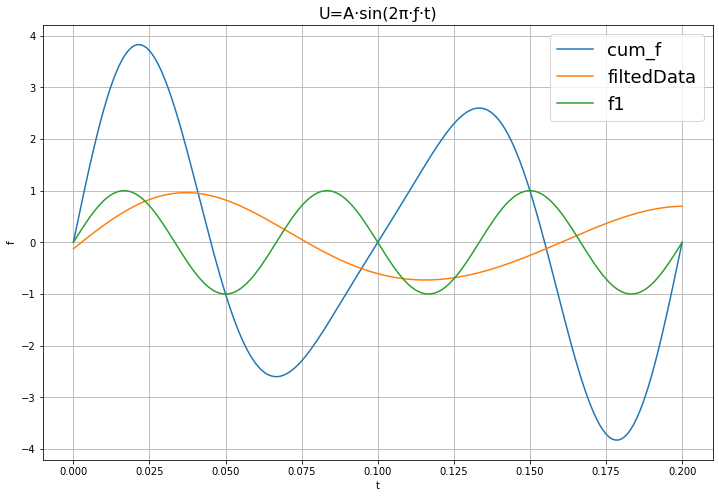

In [20]:
# Полосовой режекторный фильтр
wn1 = 2 * 10 / 1000
wn2 = 2 * 100 / 1000

wn = [wn1, wn2]
b, a = signal.butter(8, wn, 'bandstop')   # Число Параметр 8 указывает порядок фильтра
filtedData = signal.filtfilt(b, a, cum_f)  # данные - это сигнал, который нужно отфильтровать

# Посмотрим, что получилось c графиком f1
show_plot((cum_f, 'cum_f'),
          (filtedData, 'filtedData'),
          (f1, 'f1'),
          det=201)

# Здесь не получается достигнуть результата

Выводы:  
*   Для шума из случайно сгенерированных значений лучше применять фильтрацию нижних частот
*   Для шума из низкочастотного синусоидального сигнала лучше применять фильтрацию высоких частот
